# Parte 1 - Preclase

In [219]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
%matplotlib inline

In [220]:
data = pd.read_csv('Default.csv')

In [221]:
blue = data[data.default == 'No'].sample(frac=0.08)
red = data[data.default == 'Yes']

Text(0,0.5,'Income')

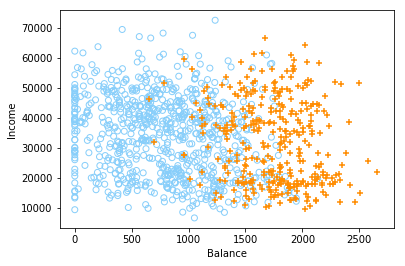

In [222]:
plt.scatter(blue.balance,blue.income,facecolors='none', edgecolors="lightskyblue")
plt.scatter(red.balance,red.income,c='darkorange',marker="+")
plt.xlabel('Balance')
plt.ylabel('Income')

Text(0,0.5,'Income')

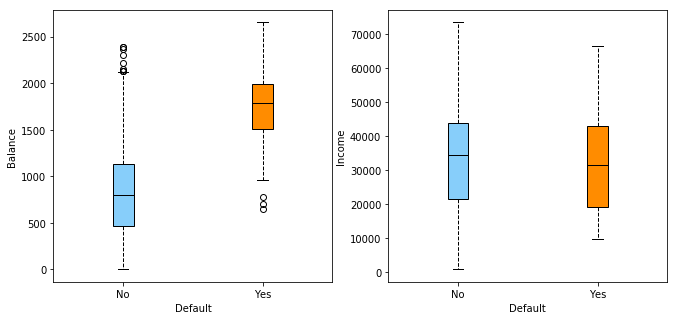

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
labels = ['No','Yes']
lineprops = dict(color='black')
whiskerprops = dict(linestyle='--')
bplot1 = axes[0].boxplot([data[data.default == 'No'].balance,red.balance],
                         whiskerprops=whiskerprops ,
                         medianprops=lineprops,
                         vert=True, patch_artist=True,labels=labels)
bplot2 = axes[1].boxplot([data[data.default == 'No'].income,red.income],
                         whiskerprops=whiskerprops ,
                         medianprops=lineprops,
                         vert=True, patch_artist=True,labels=labels)
colors = ["lightskyblue",'darkorange']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Balance')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('Income')

In [224]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [225]:
x = data.balance
x = np.array(x)
y = data.default
y = np.array(y)
y[y=='Yes'] = 1 
y[y=='No'] = 0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x = x.astype('float')
y = y.astype('int')

In [226]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(x, y)
x_proba = np.linspace(min(x),max(x),150)
y_proba = clf.predict_proba(x_proba.reshape(-1,1))

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'Probability default')

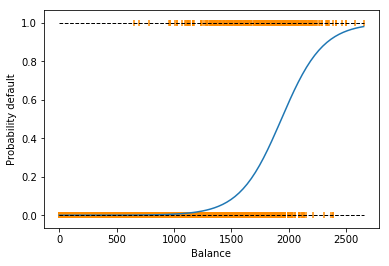

In [227]:
plt.scatter(x,y,marker='|',c='darkorange')
plt.plot(x_proba,y_proba[:,1])
plt.plot([min(x_proba),max(x_proba)],[0,0],linestyle = '--', c = 'black', linewidth = 1)
plt.plot([min(x_proba),max(x_proba)],[1,1],linestyle = '--', c = 'black', linewidth = 1)
plt.xlabel('Balance')
plt.ylabel('Probability default')

In [228]:
student = data.student
student = np.array(student)
student[student == 'Yes'] = 1 
student[student == 'No'] = 0
xx = np.array([student,np.array(data.balance)]).transpose()
y = data.default
y = np.array(y)
y[y=='Yes'] = 1 
y[y=='No'] = 0
y = y.reshape(-1,1)
y = y.astype('int')

In [229]:
clf = LogisticRegression().fit(xx, y)

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
data['defaultNum'] = list(map(lambda x : 1 if x=="Yes" else 0 , data.default))

In [231]:
x_test = np.linspace(min(data.balance),max(data.balance),10)
student_test = clf.predict_proba(np.array([np.ones(len(x_test)),x_test]).transpose())
no_student_test = clf.predict_proba(np.array([np.ones(len(x_test))-1,x_test]).transpose())

Text(0,0.5,'Default rate')

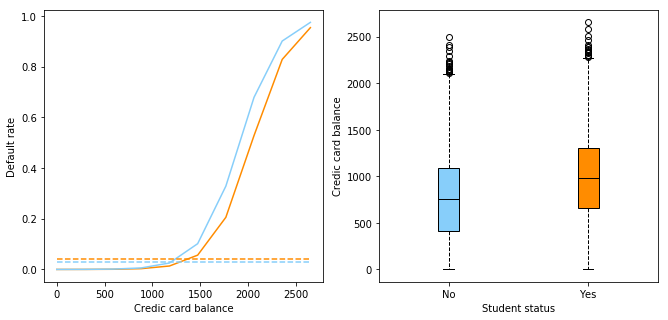

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
lineprops = dict(color='black')
axes[0].plot(x_test,student_test[:,1],c='darkorange')
axes[0].plot(x_test,no_student_test[:,1],c='lightskyblue')
axes[0].plot(x_test,np.ones(len(x_test))*np.mean(data[data.student=='Yes'].defaultNum),linestyle = '--',c='darkorange')
axes[0].plot(x_test,np.ones(len(x_test))*np.mean(data[data.student=='No'].defaultNum),linestyle = '--',c='lightskyblue')
labels = ['No','Yes']
whiskerprops = dict(linestyle='--')
bplot1 = axes[1].boxplot([data[data.student == 'No'].balance,data[data.student == 'Yes'].balance],
                         whiskerprops=whiskerprops ,medianprops=lineprops,vert=True, patch_artist=True,labels=labels)
colors = ["lightskyblue",'darkorange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
axes[1].set_xlabel('Student status')
axes[1].set_ylabel('Credic card balance')
axes[0].set_xlabel('Credic card balance')
axes[0].set_ylabel('Default rate')

# Matriz de confusión

In [233]:
from sklearn.model_selection import train_test_split
data_training, data_test = train_test_split(data,test_size = 0.25)

In [234]:
clf = LogisticRegression().fit(np.array(data_training.balance).reshape(-1,1),np.array(data_training.defaultNum).reshape(-1,1))
prediction = clf.predict(np.array(data_test.balance).reshape(-1,1))

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [235]:
def matriz_confusion(realidad,predic):
    vp = 0
    fp = 0
    fn = 0
    vn = 0
    for i in range(len(realidad)):
        if (realidad[i]==1 and predic[i]==1):
            vp += 1
        if (realidad[i]==0 and predic[i]==1):
            fp += 1
        if (realidad[i]==1 and predic[i]==0):
            fn += 1
        if (realidad[i]==0 and predic[i]==0):
            vn += 1
    matriz = np.array([[vp,fp],[fn,vn]])
    return matriz 

In [236]:
matriz_conf_test = matriz_confusion(np.array(data_test.defaultNum),prediction)
matriz_conf_test

array([[  18,    7],
       [  45, 2430]])

In [237]:
prediction_train = clf.predict(np.array(data_training.balance).reshape(-1,1))
matriz_conf_test =  matriz_confusion(np.array(data_test.defaultNum),prediction_train)
matriz_conf_test

array([[   0,   29],
       [  63, 2408]])

Dados los valores de la matriz de confusion, se puede decir que es una buena aproximacion a default dado que las conincidencias  en los verdaderos positivos y verdaderos negativos son altos.

# Parte 2

In [239]:
data = pd.read_csv('Smarket.csv')
features = data.columns[1:5]
data['directionNum'] = list(map(lambda x : 1 if x=="Up" else 0 , data.Direction))
x_training = data[data.Year <= 2004][features] 
y_training = data[data.Year <= 2004].directionNum
x_test = data[data.Year > 2004][features] 
y_test = data[data.Year > 2004].directionNum

In [240]:
clf = LogisticRegression().fit(x_training,y_training)

In [241]:
prediction_test = clf.predict(x_test)

In [245]:
matriz_conf_test = matriz_confusion(np.array(y_test),prediction_test)
matriz_conf_test

array([[110,  72],
       [ 31,  39]])

In [246]:
prediction_training = clf.predict(x_training)
matriz_conf_train = matriz_confusion(np.array(y_training),prediction_training)
matriz_conf_train

array([[344, 327],
       [163, 164]])

Dados los valores de la matriz de confusion es muy bueno prediciendo up en direction, pero no resulta igual de bueno prediciendo down en direction. Teniendo en cuenta esto, estos datos podrian ser una aproximacion aceptable para direction.